## Demo for estimating stage tilt from SMLM data

##### Setup environment

In [3]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
try:
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print('Running on GPU')
except:
    print('Running on CPU')

Running on GPU


##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [7]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='1ch',sysfile='TIRF')

##### Edit user defined parameters

In [8]:

L.param.datapath = r'Y:\Projects\Super Critical Angle Localization Microscopy\Data\10-06-2023\Data4/'
L.param.filelist = [r'Y:\Projects\Super Critical Angle Localization Microscopy\Data\10-06-2023\Data4\Data4-2023-10-7-17-36-53.h5']
L.param.gain = 0.44
L.param.ccd_offset = 100
L.param.option.insitu.stage_pos = 0.6 # micron, stage position relative to infocus at the coverslip
L.param.option.model.symmetric_mag = True
L.param.option.model.const_pupilmag = True
L.param.option.insitu.repeat = 3
L.param.roi.peak_height = 0.4
L.param.option.model.bin=1
L.param.option.model.n_max = 6

**Step 1**: use the following settings to estimate the PSF model without index mismatch, Then use the output .h5 in SMAP for localization. 

In [9]:
L.param.savename = L.param.datapath+'psf_kimm'
L.param.loss_weight.Inorm = 0.0 # weight for the minimizing the stage position
L.param.option.insitu.stage_tilt = [0,0] # tilt in [y,x], unit: nm/pixel [0.3434551, 0.9670874]
L.param.option.imaging.RI.med = 1.516
L.param.option.insitu.var_stagepos = False

Start learning

In [10]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

(1900, 256, 256)
rois shape channel : (8157, 21, 21)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.03s/it total time: 1.02s
5/6: localization: 2/2 [00:00s] 13.19it/s total time: 1.17s
c:\ProgramData\Anaconda3\envs\psfinv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\Anaconda3\envs\psfinv\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
3/6: learning: 205/250 [00:22s]  9.32it/s, current loss: 0.57143, total time: 22.00s


outlier percentage: 0.2316910785619174
rois shape channel : (577, 21, 21)


3/6: learning: 217/250 [00:22s]  9.71it/s, current loss: 0.52686, total time: 44.35s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.05s/it total time: 1.04s
5/6: localization: 2/2 [00:00s]  9.38it/s total time: 1.26s
6/6: saving results: [00:01s] total time: 3.12s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.03s/it total time: 1.02s
5/6: localization: 2/2 [00:00s]  6.67it/s total time: 1.32s
3/6: learning: 207/250 [00:27s]  7.52it/s, current loss: 0.51702, total time: 27.51s


outlier percentage: 0.23219178082191783
rois shape channel : (1121, 21, 21)


3/6: learning: 144/250 [00:16s]  8.53it/s, current loss: 0.50520, total time: 44.38s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.03s/it total time: 1.03s
5/6: localization: 2/2 [00:00s] 16.99it/s total time: 1.15s
6/6: saving results: [00:02s] total time: 3.21s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.04s/it total time: 1.02s
5/6: localization: 2/2 [00:00s]  7.50it/s total time: 1.29s
3/6: learning: 244/250 [00:30s]  7.92it/s, current loss: 0.50964, total time: 30.83s


outlier percentage: 0.23391370174110526
rois shape channel : (1012, 21, 21)


3/6: learning: 136/250 [00:15s]  8.83it/s, current loss: 0.49831, total time: 46.23s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.04s/it total time: 1.03s
5/6: localization: 2/2 [00:00s] 18.54it/s total time: 1.14s
6/6: saving results: [00:02s] total time: 3.19s


**Step 2**: Estimate stage tilt

In [11]:
f,p = io.h5.load(resfile) # load result file
L.param.insitu.frame_range = []
L.param.roi.peak_height = 0.2

Localize. `datarange` is the range of datasets used for stage tilt estimation.  Usually, 10,000 frames should be sufficient.

In [12]:
x,y,z,LL = L.localize(f,datarange=[0,5])

(2000, 256, 256)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.05s/it total time: 1.04s
5/6: localization: 2/2 [00:00s] 15.28it/s total time: 1.17s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.03s/it total time: 1.02s
5/6: localization: 2/2 [00:00s] 15.57it/s total time: 1.14s


(2000, 256, 256)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.03s/it total time: 1.02s
5/6: localization: 2/2 [00:00s] 13.34it/s total time: 1.17s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.04s/it total time: 1.03s
5/6: localization: 2/2 [00:00s] 15.39it/s total time: 1.16s


(2000, 256, 256)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.08s/it total time: 1.07s
5/6: localization: 2/2 [00:00s] 12.71it/s total time: 1.21s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.09s/it total time: 1.08s
5/6: localization: 2/2 [00:00s] 15.56it/s total time: 1.21s


(2000, 256, 256)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.07s/it total time: 1.05s
5/6: localization: 2/2 [00:00s] 13.79it/s total time: 1.20s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.04s/it total time: 1.03s
5/6: localization: 2/2 [00:00s] 15.47it/s total time: 1.16s


(2000, 256, 256)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.10s/it total time: 1.09s
5/6: localization: 2/2 [00:00s] 13.51it/s total time: 1.23s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.03s/it total time: 1.02s
5/6: localization: 2/2 [00:00s] 14.62it/s total time: 1.15s


Remove outliers, adjust the threshold for `LL` to remove outliers.

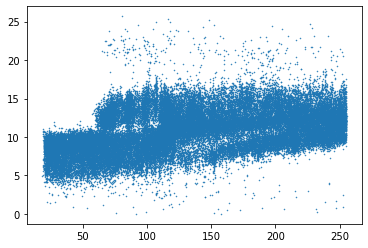

In [13]:
maskll = LL>-300
xf = x[maskll]
yf = y[maskll]
zf = z[maskll]
plt.plot(xf,zf,'.',markersize=1)

Identify background region, adjust `zpeak` between [0,1] so that the output image contains only the background region.

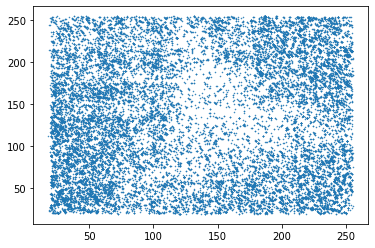

In [30]:
x0,y0,z0 = L.identify_background(xf,yf,zf,zpeak=0.4)
plt.plot(x0,y0,'.',markersize=1)

Estimate stage tilt. 

In [31]:
X = np.vstack([y0,x0,np.ones(x0.shape)])
Y = z0*p.pixel_size.z*1e3
beta=np.matmul(np.matmul(np.linalg.inv(np.matmul(X,X.transpose())),X),Y.transpose())

Check stage tilt correction.

Text(0.5, 1.0, 'after correction')

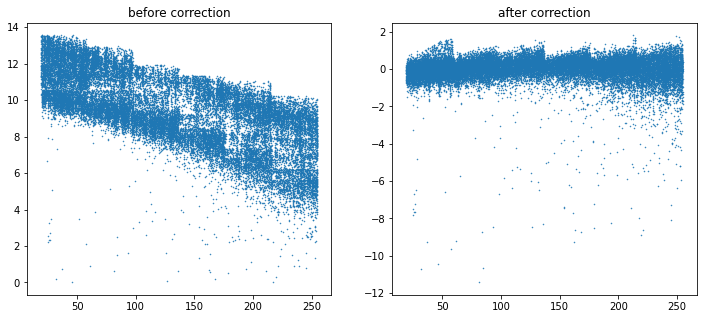

In [32]:
zcorrected = z0-np.matmul(beta,X)/p.pixel_size.z/1e3
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(1,2,1)
plt.plot(y0,z0,'.',markersize=1)
plt.title('before correction')
ax = fig.add_subplot(1,2,2)
plt.plot(y0,zcorrected,'.',markersize=1)
plt.title('after correction')


Copy the stagetilt value and move to the notebook: `demo_insituPSF_1ch_tilt.ipynb`

In [5]:
stagetilt = -beta[0:2]
print('Stage tilt: ',list(stagetilt))

Stage tilt:  [1.05685207, -0.84441123]
